In [1]:
#importing nessary libraries
import pandas as pd #data processing and CSV file I/O
import numpy as np #linear algebra and math functions
import matplotlib.pyplot as plt #data visualization and plotting
import seaborn as sns #data visualization and plotting
%matplotlib inline

## Opening the dataset and creating a dataframe using pandas

In [3]:
df = pd.read_csv(r"Data\Stock_Price_Prediction.csv") #reading the data from csv file
df.head(10) #displaying first 10 rows of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,07-07-2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,08-07-2010,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,09-07-2010,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,12-07-2010,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,13-07-2010,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [15]:
df.tail(10) #displaying last 10 rows of the data

,Date,Open,High,Low,Close,Adj Close,Volume
2406,21-01-2020,530.250000,548.580017,528.409973,547.200012,547.200012,17803500
2407,22-01-2020,571.890015,594.500000,559.099976,569.559998,569.559998,31369000
2408,23-01-2020,564.250000,582.000000,555.599976,572.200012,572.200012,19651000
2409,24-01-2020,570.630005,573.859985,554.260010,564.820007,564.820007,14353600
2410,27-01-2020,541.989990,564.440002,539.280029,558.020020,558.020020,13608100
2411,28-01-2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,29-01-2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,30-01-2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,31-01-2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,03-02-2020,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [6]:
df.shape #displaying the shape of the data

(2416, 7)

In [7]:
df.columns #displaying the columns of the data

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [14]:
df.isnull().sum() #checking for null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


### Visualizing the dataset using matplotlib

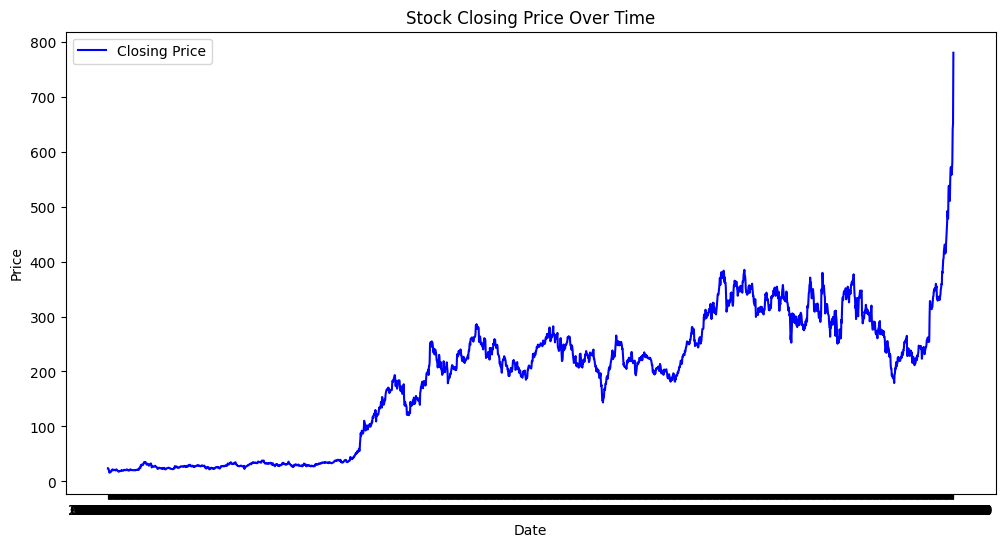

In [12]:
# Plot stock price trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

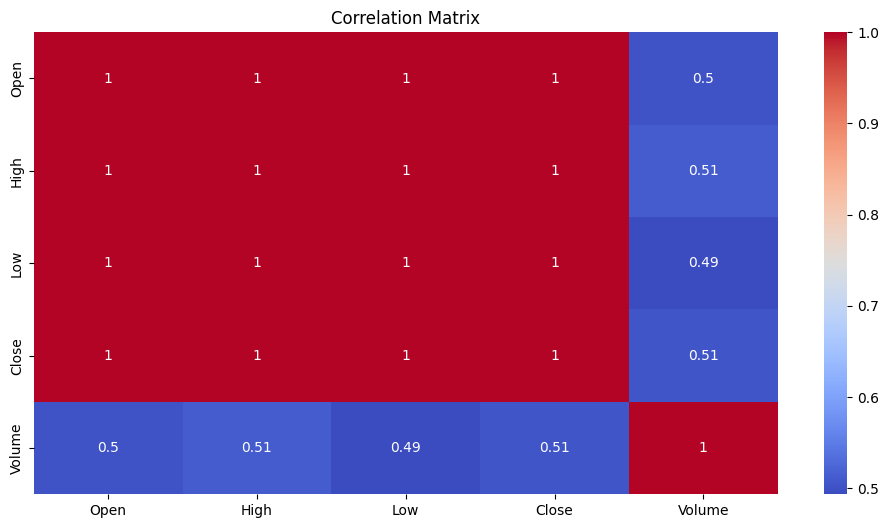

In [31]:
#correlation matrix
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
corr = df[columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Aumba\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


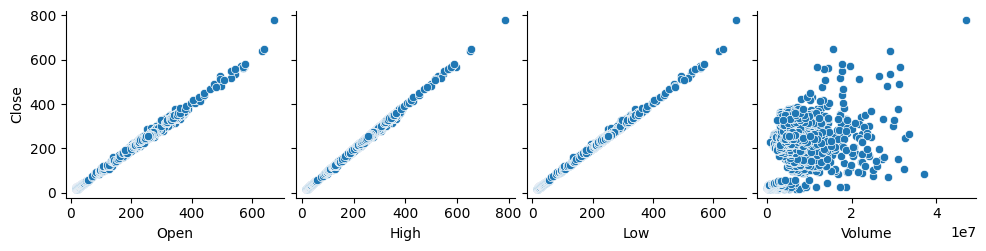

In [24]:
sns.pairplot(data=df, y_vars=['Close'], x_vars=['Open', 'High', 'Low', 'Volume']) # Plotting pairplot to see the relationship between the variables

## Importing SciKit Learn to use Linear Regression model, decision tree regressor and to split the dataset into training and testing sets
Also importing preprocessing to scale the data and metrics to calculate the accuracy of the model. r2_score is used to calculate the accuracy of the model.

In [25]:
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.model_selection
from sklearn.linear_model import LinearRegression #importing LinearRegression from sklearn.linear_model
from sklearn.tree import DecisionTreeRegressor #importing DecisionTreeRegressor from sklearn.tree
from sklearn.metrics import r2_score #importing r2_score from sklearn.metrics

## Linear Regression Model

Linear Regression is a statistical model that represents the relationship between a dependent variable 'y' and one or more independent variables 'x' as a straight line: y=mx+c. 'm' is the slope, indicating the impact of 'x' on 'y,' and 'c' is the intercept, the value of 'y' when 'x' is zero. Linear regression is used to predict 'y' based on 'x' and find the best-fitting line that minimizes the difference between predicted and actual values.

In [39]:
# setting the data as feature variables and target variable
X = df[['Open', 'High', 'Low', 'Volume']] #Feature variables
Y = df['Close'] #Target variable

# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5) #Splitting the data into 80% training and 20% testing data


In [40]:
# Linear Regression
lr = LinearRegression() #creating an object of LinearRegression

# Training the model
lr.fit(X_train, Y_train) #fitting the training data into the model

LinearRegression()

In [41]:
# Testing the model
Y_pred_lr = lr.predict(X_test) #predicting the test data

# Evaluating the model
r2_lr = r2_score(Y_test, Y_pred_lr) #calculating the r2_score
print('r2 score for Linear Regression: ', r2_lr) #printing the r2_score

r2 score for Linear Regression:  0.9996665603871623


## Decision Tree Regressor Model

The Decision Tree Regressor is a machine learning model that uses a tree-like structure to make predictions for continuous numerical target values. It recursively splits the data into subsets based on the input features and assigns a predicted value to each subset. The predicted value for each subset is the mean of the target values of the samples in that subset.

In [42]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor() #creating an object of DecisionTreeRegressor

# Training the model
dtr.fit(X_train, Y_train) #fitting the training data into the model

DecisionTreeRegressor()

In [43]:
# Testing the model
Y_pred_dtr = dtr.predict(X_test) #predicting the test data

# Evaluating the model
r2_dtr = r2_score(Y_test, Y_pred_dtr) #calculating the r2_score
print('r2 score for Decision Tree Regressor: ', r2_dtr) #printing the r2_score

r2 score for Decision Tree Regressor:  0.9991348406888619


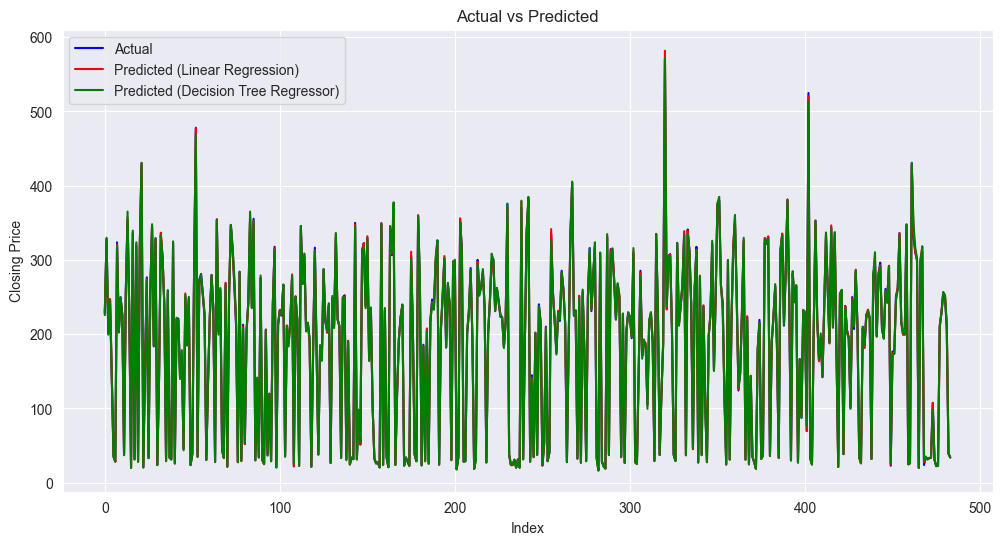

In [44]:
# Plotting the actual and predicted values
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Actual', color='blue')
plt.plot(Y_pred_lr, label='Predicted (Linear Regression)', color='red')
plt.plot(Y_pred_dtr, label='Predicted (Decision Tree Regressor)', color='green')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Conclusion

The accuracy of the Linear Regression model and the Decision Tree Regressor model is identical. The accuracy of the model is 99.9% which is very high. The models are very accurate and can be used to predict the stock prices in the future. The accuracy of the models can be increased by using more data and by using more efficient algorithms.